# Q1 A non neural network approach to your to ML

Import librarys and functions needed for this problem

In [2]:
# Librays that are imported 
import pandas as pd
import numpy as np

# Visulise data
from matplotlib import pyplot as plt
import seaborn as sns

# Create Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Used to find the best tree depth
from sklearn.model_selection import cross_validate

In [3]:
# Import helper functions from functions.py
import sys
import importlib
sys.path.append('..')
import functions
# reload file to check if there were any updates to file
importlib.reload(functions)
from functions import *

## Load dataset
palmerpenguins_extended.csv    
link: https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended?select=palmerpenguins_extended.csv

The data set that is going to be used is the palmerpenguins_extended dataset which contains the research information about 3 different species of penguins.                      
The model that is going to be made is a decision tree that will try and predict the class in this case species of a penguin.

In [4]:
# File path of were dataset is saved
Path = "C:/Users/Billy/Documents/University/Year 4/Comp/CW2/palmerpenguins_extended.csv"
df_penguin = get_data(Path)
# Use .head() to see all the different collumns of the dataset
df_penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021


In [5]:
# Find the different unique entries in each collumn containing text
col = ['species','island','sex','diet','life_stage','health_metrics','year']
for i in range(7):
    print(col[i],":",df_penguin[col[i]].unique())

species : ['Adelie' 'Chinstrap' 'Gentoo']
island : ['Biscoe' 'Dream' 'Torgensen']
sex : ['female' 'male']
diet : ['fish' 'krill' 'parental' 'squid']
life_stage : ['adult' 'juvenile' 'chick']
health_metrics : ['overweight' 'healthy' 'underweight']
year : [2021 2022 2023 2024 2025]


## Plotting numerical features

You can use pairplot to see how different features of the dataset relate to each other. <br>
You are also able to see how these features change for each class (species)

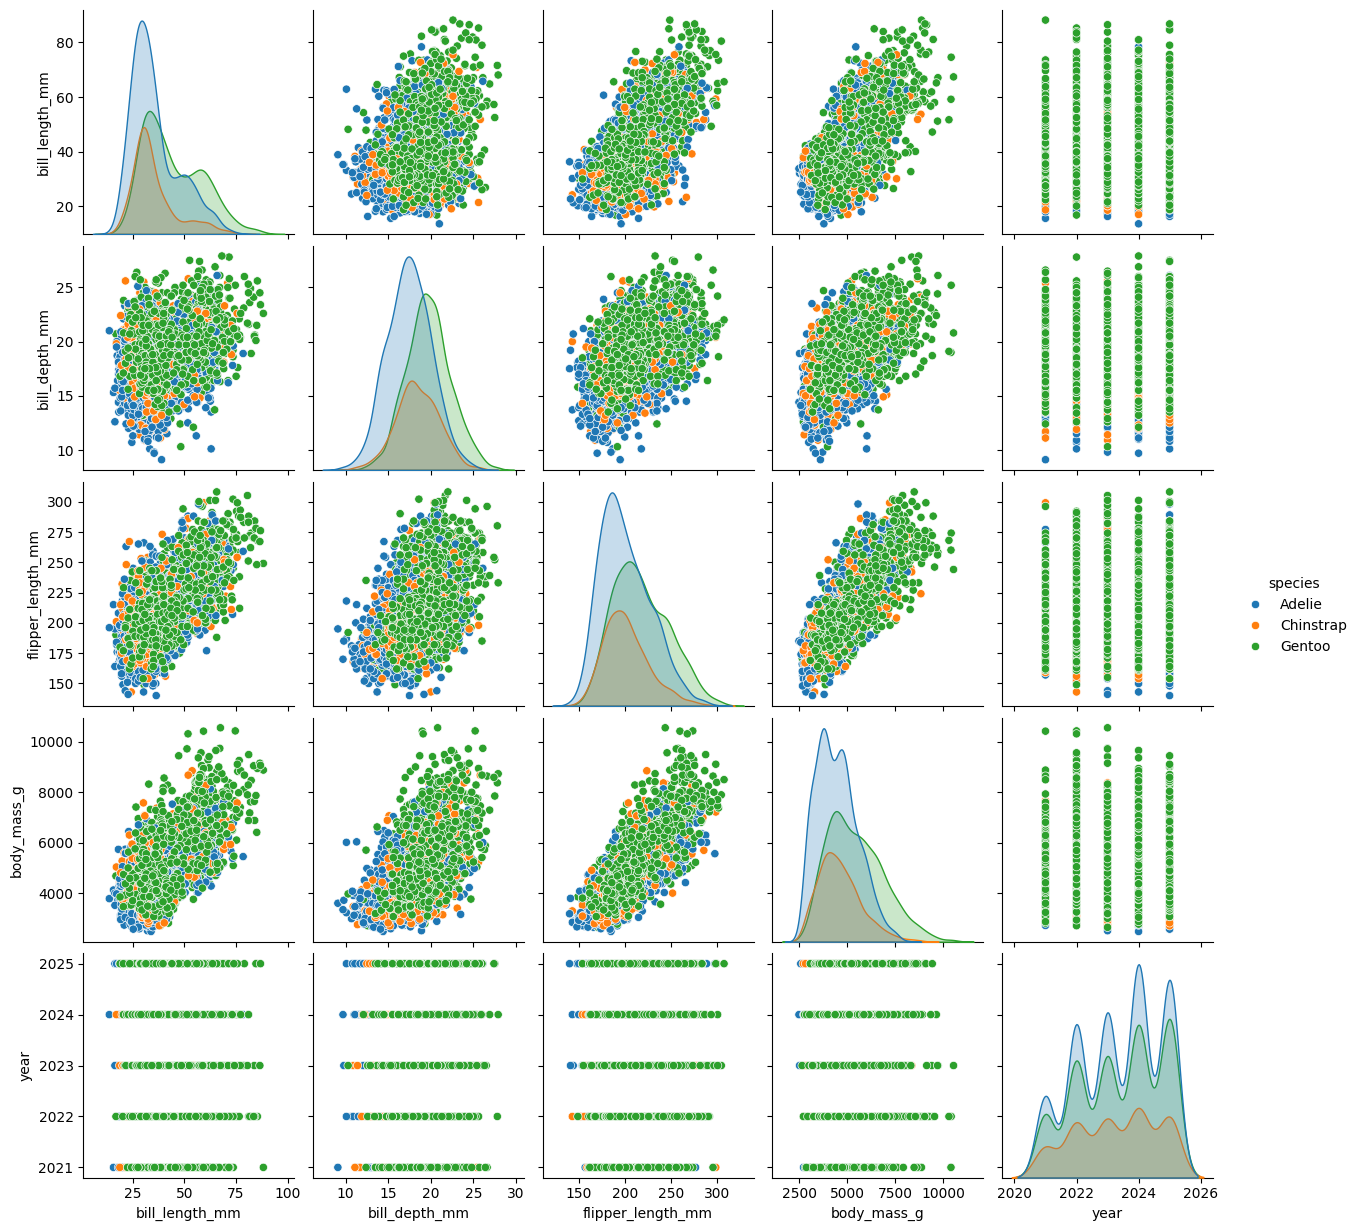

In [6]:
# Use pairplot to plot each feature agaisnt each other to see if there is any trend between them and the 3 species
# Additionally see if there is a feature that doesnt have an impact on species
sns.pairplot(df_penguin,hue='species')

## Cleaning the data in the Penguin dataset

When cleaning data you first remove any features that are not needed when traing a model or have very little impact. <br>
Next you change any features that contain text into number so that it can be used in training/testing.

From looking at the pairplot you could see that the year doesnt have a clear impact on the species. <br>
As it doesnt impact the species it will be remvoed from the dataset meaning wont be used when training/testing the model. <br>
The other features are left in as you can see that they differ between classes

In [ ]:
df_penguin = augment_data(df_penguin);
# Augment_data is a function imported from functions.py
# Augment_data takes the dataframe and changes the text in each collumn into numbers so that it can be used when fiting to a descion tree.
# Also removes the year collumn/feature

c:\Users\Billy\Documents\University\Year 4\Comp\CW2\CW2 Code\COURSEWORK-2-DATA-SCIENCE-PROJECT\py\Q1_folder\..\functions.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe_name.island = dataframe_name.island.replace({'Biscoe':0,'Dream':1,'Torgensen':2})
c:\Users\Billy\Documents\University\Year 4\Comp\CW2\CW2 Code\COURSEWORK-2-DATA-SCIENCE-PROJECT\py\Q1_folder\..\functions.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe_name.species = dataframe_name.species.replace({'Adelie':0,'Chinstrap':1,'Gentoo':2})
c

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics
0,0,0,53.4,17.8,219.0,5687.0,0,0,0,0
1,0,0,49.3,18.1,245.0,6811.0,0,0,0,0
2,0,0,55.7,16.6,226.0,5388.0,0,0,0,0
3,0,0,38.0,15.6,221.0,6262.0,0,0,0,0
4,0,0,60.7,17.9,177.0,4811.0,0,0,1,0


 You can now see that the year collumn has been removed and any text has been replaced

In [21]:
df_penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics
0,0,0,53.4,17.8,219.0,5687.0,0,0,0,0
1,0,0,49.3,18.1,245.0,6811.0,0,0,0,0
2,0,0,55.7,16.6,226.0,5388.0,0,0,0,0
3,0,0,38.0,15.6,221.0,6262.0,0,0,0,0
4,0,0,60.7,17.9,177.0,4811.0,0,0,1,0


To train and test a classifier model you need to split your data into a training and test set <br>
To do this use the datasplit_train_test() imported function <br>
<br>
datasplit_train_test takes a dataset and seperates the features (X) and the target (y) of the data. In this case the target is the species. <br>
Next it will normalise the features stopping features with larger falues from having larger impacts. <br>
Lastly it makes sets of data for training and testing the classifer. In this case it will be 70% training and 30% test data. <br>
<br>
The reason that a 70-30 split is used is because one class has a smaller number of entries then the other. <br>
To have more of this class when testing a larger split is used on the testing data at 30% <br>

In [22]:
Xtrain, Xtest, ytrain, ytest = datasplit_train_test(df_penguin)


## Creating decision tree

In [10]:
# Create Decison tree classifier model called 'DecisionTree'
DecisionTree = DecisionTreeClassifier()
# Train the model by fitting the X and y training data to model
DecisionTree = DecisionTree.fit(Xtrain,ytrain)

Testing accuracy of model using test data

In [ ]:
# using X test data see what species the model will predict
yPred = DecisionTree.predict(Xtest)

# Test model on unseen data. Which will be Xtest and ytest
# This will find the accuracy of the prediction of the class compared to actual class
test_accuracy = DecisionTree.score(Xtest, ytest)

# Test model on seen data. Which will be Xtrain and ytrain from when the model was first trained.
# This let us see if the accuracy with unseen data is low if the reason is over-fitting.
train_accuracy = DecisionTree.score(Xtrain, ytrain)
print(f"Training accuracy on {train_accuracy}")
print(f"Testing accuracy on {test_accuracy}")

Training accuracy on 1.0
Testing accuracy on 0.749271137026239


See Parameters of trained decision Tree

In [12]:
#n_nodes tells us the depth of the decision tree 
n_nodes = DecisionTree.get_depth()
# n_leaves is all the possible outcomes of the decision tree
n_leaves = DecisionTree.get_n_leaves()
# model_params will show all the other parameters of the Decision tree
model_params = DecisionTree.get_params()

# model_params is of type dictonary so to make it easier display/read. We make it into a datadrame.
model_params_df_dt_clf = pd.DataFrame([model_params]).T
print(f"nodes: {n_nodes},")
print(f"leaves: {n_leaves},")
print(f"model parameters:")
display(model_params_df_dt_clf)
print("\n")

nodes: 26,
leaves: 360,
model parameters:


,0
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


Plotting Decision Tree

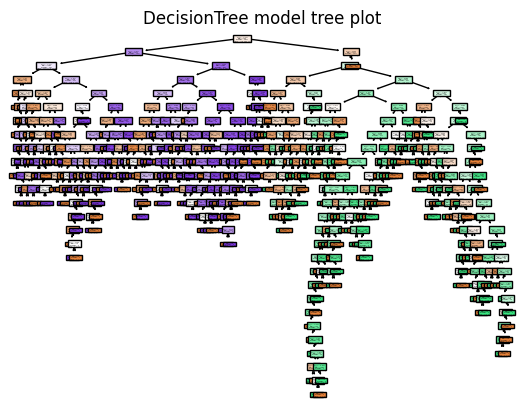

In [13]:
# Plotting the decision tree lets you see what decision the tree makes at each step to make a prediction
fig = plt.figure()
tree.plot_tree(DecisionTree, filled=True)
plt.title("DecisionTree model tree plot")
plt.show()

## Finding the best max depth
1. Reduce the size of decision tree plot
2. educe computational time needed to train the model

Find the depth to use on the model by using cross validate.  <br>
Cross validate finds the dpeth were the model doesnt over fit to the training data but is still able to make accurate predictions.

In [ ]:
# Tree depths to try
m = np.linspace(1,50,50,dtype=int)
# List of cross validation scores
data = []
# Loop through each depth
for i in m:
  # Create model at depth m
  clfm = DecisionTreeClassifier(random_state=0,max_depth=i)
  # Cross validate model
  cv_results = cross_validate(clfm, Xtrain, ytrain, cv=10)
  # Get score 
  scores = cv_results['test_score']
  # Calculate error rate using score
  error_rate = 1- scores.mean()
  # Add score to data list with the depth
  data.append([i,error_rate])
print(data)

[[np.int64(1), np.float64(0.33624437603599344)], [np.int64(2), np.float64(0.2964006630357565)], [np.int64(3), np.float64(0.2657660430973242)], [np.int64(4), np.float64(0.27354487331281085)], [np.int64(5), np.float64(0.2642907885389534)], [np.int64(6), np.float64(0.2643073644328676)], [np.int64(7), np.float64(0.25993132843949807)], [np.int64(8), np.float64(0.24924224484963298)], [np.int64(9), np.float64(0.24730049727681747)], [np.int64(10), np.float64(0.2463248875207199)], [np.int64(11), np.float64(0.25218091404215026)], [np.int64(12), np.float64(0.2546128344778593)], [np.int64(13), np.float64(0.2526639829505092)], [np.int64(14), np.float64(0.25801089273028655)], [np.int64(15), np.float64(0.25606677717262616)], [np.int64(16), np.float64(0.26238219275396646)], [np.int64(17), np.float64(0.25702817901965436)], [np.int64(18), np.float64(0.26335306654037416)], [np.int64(19), np.float64(0.26140184702817904)], [np.int64(20), np.float64(0.26383850343357806)], [np.int64(21), np.float64(0.2638361

Depth with lowest CV error: 9


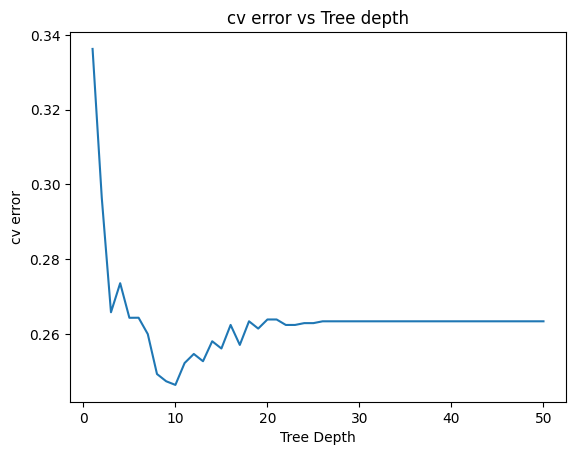

In [25]:
# To make the depth easier to see plot the error rate for each depth on a graph
data = np.array(data)
treedepth = (data[:,0]).astype(dtype=int)
cverr = (data[:,1])
plt.figure
plt.plot(treedepth,cverr)
plt.xlabel("Tree Depth")
plt.ylabel("cv error")
plt.title("cv error vs Tree depth")

# Find best depth by using depth at lowest error rate
print("Depth with lowest CV error:",np.argmin(cverr))


## Retraining model at lower depth

In [16]:
# Now using the depth found previously train a new Decision tree with a max depth of 9
DecisionTree_reduced = DecisionTreeClassifier(max_depth=9)
DecisionTree_reduced = DecisionTree_reduced.fit(Xtrain,ytrain)

In [17]:
# Find the accuracy of the new model on the training and test data
train_accuracy = DecisionTree_reduced.score(Xtrain, ytrain)
test_accuracy = DecisionTree_reduced.score(Xtest, ytest)
print(f"Training accuracy on {train_accuracy}")
print(f"Testing accuracy on {test_accuracy}")

Training accuracy on 0.891642371234208
Testing accuracy on 0.7485422740524781


The accuracy of the new model using a lower tree depth remained nearly the same. <br>
Even though it didnt change it does mean that the time it takes to train the model is reduced. which for larger datasets becomes very important. <br>
Although the overall accuracy of the model didnt change the accuracy of the individual classes may have.

In [18]:
# Although the accuracy of the testing data only went up by a small amount it may have changed the accuracy for the individual classes
# This can be seen it raised class 1 from 56% to 73% accuracy which is alot better
# although it did reduce class 0 from 71% to 63% its better to have similar accuracy between the 3 classes
for i in range(3):
    Xtest_class = Xtest[ytest['species'] == i]
    data_len = len(Xtest_class)
    ytest_class = pd.DataFrame([i]*data_len,columns=ytest.columns)

    reducedAccuracy = DecisionTree_reduced.score(Xtest_class,ytest_class)
    originalAccuracy = DecisionTree.score(Xtest_class,ytest_class)
    print(f"Class {i}")
    print(f"Reduced model accuracy: {reducedAccuracy}")
    print(f"original model accuracy: {originalAccuracy}")
    print("")

Class 0
Reduced model accuracy: 0.6352
original model accuracy: 0.72

Class 1
Reduced model accuracy: 0.7364016736401674
original model accuracy: 0.5774058577405857

Class 2
Reduced model accuracy: 0.8937007874015748
original model accuracy: 0.8661417322834646



For the reduced model you can see that it brought the accuracy for all 3 models closer togther.

### Replotting the tree diagram

Now that the models depth has been reduced it can be replotted to see the shape of the tree.
 

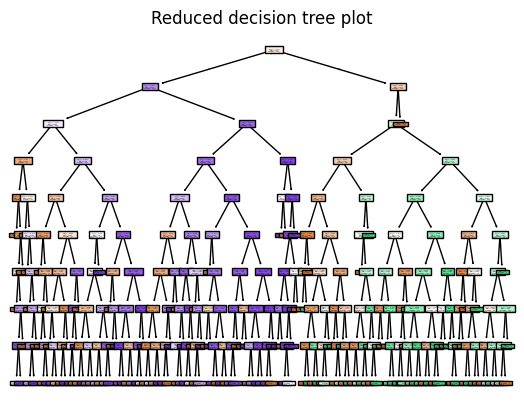

In [26]:
fig = plt.figure()
tree.plot_tree(DecisionTree_reduced, filled=True)
plt.title("Reduced decision tree plot")
plt.show()

## Importance of each feature in the Decision tree model

Feature importance tells you how much of an impact each feature from the data had on the making predictions. <br>

If the model did take a long time to train you could look at which feature had the smallest impact and choose to not include it when training a model. <br>
This would reduce the time taken when training. <br>

The 2 features in this dataset that might be removed would be sex and diet and if that wasnt enough reduction then life_stage and health_metrics.

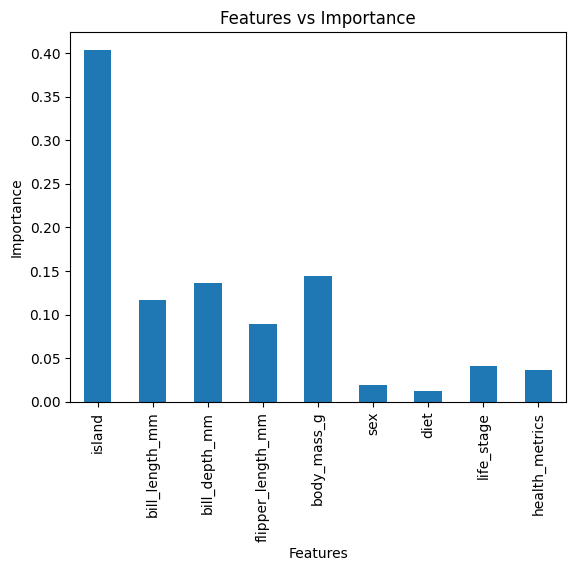

In [27]:
# Plot feature importance on a bar chart for easier comparison between classes
importances = DecisionTree.feature_importances_
features = Xtrain.columns
featureImportance = pd.Series(importances,index=features)
featureImportance.plot.bar()
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features vs Importance");